# Importing all dependencies

In [1]:
import chardet
import pandas as pd
import numpy as np
import csv
from forex_python.converter import CurrencyRates

# Importing and connecting Arkouda

In [2]:
import arkouda as ak

    _         _                   _       
   / \   _ __| | _____  _   _  __| | __ _ 
  / _ \ | '__| |/ / _ \| | | |/ _` |/ _` |
 / ___ \| |  |   < (_) | |_| | (_| | (_| |
/_/   \_\_|  |_|\_\___/ \__,_|\__,_|\__,_|
                                          

Client Version: v2021.10.07+3.g1e77539.dirty


In [3]:
ak.connect(connect_url='tcp://MacBook-Pro-7.local:5555 ') #connecting to arkouda server

/Users/narenkhatwani/Documents/GitHub/arkouda/arkouda/client.py:146: RuntimeWarning: Version mismatch between client (v2021.10.07+3.g1e77539.dirty) and server (v2021.08.20+18.g7a657ad); this may cause some commands to fail or behave incorrectly! Updating arkouda is strongly recommended.
  warnings.warn(('Version mismatch between client ({}) and server ({}); ' +
connected to arkouda server tcp://*:5555


# 1. Read the Data

In [4]:
#Printing the first few values from the DataSet
!head /Users/narenkhatwani/Desktop/Resources/CSV_files/wfp_market_food_prices.csv

adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP
1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,6,2014,50.0,WFP
1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,7,2014,50.0,WFP
1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,8,2014,50.0,WFP
1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,9,2014,50.0,WFP


In [5]:
#Checking the encoding of the csv file, resolved the partial encoding error
with open("/Users/narenkhatwani/Desktop/Resources/CSV_files/wfp_market_food_prices.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

## Column Name Descriptions
1. adm0_id: country id
2. adm0_name: country name
3. adm1_id: locality id
4. adm1_name: locality name
5. mkt_id: market id
6. mkt_name: market name
7. cm_id: commodity purchase id
8. cm_name: commodity purchased
9. cur_id: currency id
10. cur_name: name of currency
11. pt_id: market type id
12. pt_name: market type (Retail/Wholesale/Producer/Farm Gate)
13. um_id: measurement id
14. um_name: unit of goods measurement
15. mp_month: month recorded
16. mpyear: year recorded *mpprice: price paid
17. mp_commoditysource: Source supplying price information

In [6]:
#Reading the csv file and creating a dataframe
df=pd.read_csv("/Users/narenkhatwani/Desktop/Resources/CSV_files/utf8/wfpvam_foodprices_utf8.csv")

#displaying the top 5 rows for testing
df.head(5)

/Users/narenkhatwani/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


adm0_id    adm0_name  adm1_id   adm1_name  mkt_id  mkt_name  cm_id  \
0        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   
1        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   
2        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   
3        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   
4        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   

          cm_name  cur_id cur_name  pt_id pt_name  um_id um_name  mp_month  \
0  Bread - Retail       0      AFN     15  Retail      5      KG         1   
1  Bread - Retail       0      AFN     15  Retail      5      KG         2   
2  Bread - Retail       0      AFN     15  Retail      5      KG         3   
3  Bread - Retail       0      AFN     15  Retail      5      KG         4   
4  Bread - Retail       0      AFN     15  Retail      5      KG         5   

   mp_year  mp_price  mp_commoditysource  
0     2014      50.0                 NaN  
1     2014      50.0                 NaN  
2     2014      50.0                 NaN  
3     2014      50.0                 NaN  
4     2014      50.0                 NaN

#### In order to read the csv stating a specific encoding we can use the encoding parameter

In [7]:
#df=pd.read_csv("/Users/narenkhatwani/Documents/GitHub/arkouda/Notebooks/Resources/wfp_market_food_prices_utf8.csv,encoding='ascii')

# 2. Cleaning the Data 

## 2.1 Convert the csv to hdf file using to_hdf method of Python (not recommended)

In [8]:
df2=pd.read_csv("/Users/narenkhatwani/Desktop/Resources/CSV_files/utf8/wfpvam_foodprices_utf8.csv")

df2.to_hdf("/Users/narenkhatwani/Desktop/Resources/CSV_files/to_hdf/Food_prices_hdf5.h5", 'data', mode='w', format='table')


/Users/narenkhatwani/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
print(pd.read_hdf('/Users/narenkhatwani/Desktop/Resources/CSV_files/to_hdf/Food_prices_hdf5.h5', 'data').head(5))

   adm0_id    adm0_name  adm1_id   adm1_name  mkt_id  mkt_name  cm_id  \
0        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   
1        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   
2        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   
3        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   
4        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   

          cm_name  cur_id cur_name  pt_id pt_name  um_id um_name  mp_month  \
0  Bread - Retail       0      AFN     15  Retail      5      KG         1   
1  Bread - Retail       0      AFN     15  Retail      5      KG         2   
2  Bread - Retail       0      AFN     15  Retail      5      KG         3   
3  Bread - Retail       0      AFN     15  Retail      5      KG         4   
4  Bread - Retail       0      AFN     15  Retail      5      KG         5   

   mp_year  mp_price  mp_commoditysource  
0     2014      50.0                 NaN  
1     

## 2.2 Conversion to .hdf5 using Pandas

In [10]:
pdgreen = pd.read_csv('/Users/narenkhatwani/Desktop/Resources/CSV_files/utf8/wfpvam_foodprices_utf8.csv')
# transfer columns of DataFrame to arkouda
def ak_create_akdict_from_df(df):
    akdict = {}
    for cname in df.keys():
        if df[cname].dtype.name == 'object':
            akdict[cname] = ak.from_series(df[cname],dtype=np.str)
        else:
            akdict[cname] = ak.from_series(df[cname])

    return akdict

/Users/narenkhatwani/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
#Passing the dataframe through the converter function to procure hdf file
green_from_pandas = ak_create_akdict_from_df(pdgreen)

In [12]:
print(green_from_pandas)

{'adm0_id': array([1 1 1 ... 152 152 152]), 'adm0_name': array(['Afghanistan', 'Afghanistan', 'Afghanistan', ... , 'Malawi', 'Malawi', 'Malawi']), 'adm1_id': array([272 272 272 ... 1890 1890 1890]), 'adm1_name': array(['Badakhshan', 'Badakhshan', 'Badakhshan', ... , 'Southern Region', 'Southern Region', 'Southern Region']), 'mkt_id': array([266 266 266 ... 823 823 823]), 'mkt_name': array(['Fayzabad', 'Fayzabad', 'Fayzabad', ... , 'Thondwe', 'Thondwe', 'Thondwe']), 'cm_id': array([55 55 55 ... 51 51 51]), 'cm_name': array(['Bread - Retail', 'Bread - Retail', 'Bread - Retail', ... , 'Maize - Retail', 'Maize - Retail', 'Maize - Retail']), 'cur_id': array([0 0 0 ... 0 0 0]), 'cur_name': array(['AFN', 'AFN', 'AFN', ... , 'MWK', 'MWK', 'MWK']), 'pt_id': array([15 15 15 ... 15 15 15]), 'pt_name': array(['Retail', 'Retail', 'Retail', ... , 'Retail', 'Retail', 'Retail']), 'um_id': array([5 5 5 ... 5 5 5]), 'um_name': array(['KG', 'KG', 'KG', ... , 'KG', 'KG', 'KG']), 'mp_month': array([1 2 3 .

In [13]:
data_pandas_hdf_convert= green_from_pandas

In [14]:
data_pandas_hdf_convert['adm0_id']

array([1 1 1 ... 152 152 152])

## 2.3 Conversion to .hdf5 using Arkouda

### Handling Currency Conversion

In [15]:
c = CurrencyRates()

In [16]:
a_dict=c.get_rates('USD')

In [17]:
a_dict.update(USD=1)
a_dict.update(AFN=91.30)

a_dict

{'EUR': 0.8726003490401397,
 'JPY': 113.95287958115185,
 'BGN': 1.7066317626527052,
 'CZK': 22.03664921465969,
 'DKK': 6.489703315881327,
 'GBP': 0.7464048865619547,
 'HUF': 318.324607329843,
 'PLN': 4.03979057591623,
 'RON': 4.317102966841187,
 'SEK': 8.695287958115184,
 'CHF': 0.9215532286212915,
 'ISK': 131.239092495637,
 'NOK': 8.699389179755673,
 'HRK': 6.554799301919721,
 'RUB': 71.14424083769634,
 'TRY': 9.913176265270508,
 'AUD': 1.3698952879581154,
 'BRL': 5.443542757417103,
 'CAD': 1.2582024432809773,
 'CNY': 6.395462478184992,
 'HKD': 7.792233856893543,
 'IDR': 14260.314136125655,
 'INR': 74.44066317626528,
 'KRW': 1180.7417102966842,
 'MXN': 20.538132635253056,
 'MYR': 4.167975567190227,
 'NZD': 1.4239092495636998,
 'PHP': 50.062827225130896,
 'SGD': 1.3539267015706808,
 'THB': 32.85514834205934,
 'ZAR': 15.250872600349041,
 'USD': 1,
 'AFN': 91.3}

In [18]:
(pd.DataFrame.from_dict(data=a_dict, orient='index').to_csv('/Users/narenkhatwani/Desktop/Resources/CSV_files/currency_rates/dict_file.csv', header=True))


header = ["cur_name", "conversion_rate"]

with open('/Users/narenkhatwani/Desktop/Resources/CSV_files/currency_rates/dict_file.csv', 'r') as fp:
    reader = csv.DictReader(fp, fieldnames=header)

    # use newline='' to avoid adding new CR at end of line
    with open('/Users/narenkhatwani/Desktop/Resources/CSV_files/currency_rates/clean_rates.csv', 'w', newline='') as fh: 
        writer = csv.DictWriter(fh, fieldnames=reader.fieldnames)
        writer.writeheader()
        header_mapping = next(reader)
        writer.writerows(reader)#working

In [19]:
data1 = pd.read_csv('/Users/narenkhatwani/Desktop/Resources/CSV_files/utf8/wfpvam_foodprices_utf8.csv') 

data2 = pd.read_csv('/Users/narenkhatwani/Desktop/Resources/CSV_files/currency_rates/clean_rates.csv') 

# using merge function by setting how='left' 

output2 = pd.merge(data1, data2,on='cur_name',how='left') 

# displaying result 

In [20]:
output2.head(5) 

adm0_id    adm0_name  adm1_id   adm1_name  mkt_id  mkt_name  cm_id  \
0        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   
1        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   
2        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   
3        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   
4        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   

          cm_name  cur_id cur_name  pt_id pt_name  um_id um_name  mp_month  \
0  Bread - Retail       0      AFN     15  Retail      5      KG         1   
1  Bread - Retail       0      AFN     15  Retail      5      KG         2   
2  Bread - Retail       0      AFN     15  Retail      5      KG         3   
3  Bread - Retail       0      AFN     15  Retail      5      KG         4   
4  Bread - Retail       0      AFN     15  Retail      5      KG         5   

   mp_year  mp_price  mp_commoditysource  conversion_rate  
0     2014      50.0                 NaN             91.3  
1     2014      50.0                 NaN             91.3  
2     2014      50.0                 NaN             91.3  
3     2014      50.0                 NaN             91.3  
4     2014      50.0                 NaN             91.3

In [21]:
output3 = output2[output2['conversion_rate'].notna()]

In [22]:
output3.head(5)

adm0_id    adm0_name  adm1_id   adm1_name  mkt_id  mkt_name  cm_id  \
0        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   
1        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   
2        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   
3        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   
4        1  Afghanistan      272  Badakhshan     266  Fayzabad     55   

          cm_name  cur_id cur_name  pt_id pt_name  um_id um_name  mp_month  \
0  Bread - Retail       0      AFN     15  Retail      5      KG         1   
1  Bread - Retail       0      AFN     15  Retail      5      KG         2   
2  Bread - Retail       0      AFN     15  Retail      5      KG         3   
3  Bread - Retail       0      AFN     15  Retail      5      KG         4   
4  Bread - Retail       0      AFN     15  Retail      5      KG         5   

   mp_year  mp_price  mp_commoditysource  conversion_rate  
0     2014      50.0                 NaN             91.3  
1     2014      50.0                 NaN             91.3  
2     2014      50.0                 NaN             91.3  
3     2014      50.0                 NaN             91.3  
4     2014      50.0                 NaN             91.3

In [23]:
output3.to_csv('/Users/narenkhatwani/Desktop/Resources/Final_csv_cleaned/global_food_clean.csv', index=False)

In [24]:
!python3 /Users/narenkhatwani/Documents/GitHub/arkouda/converter/csv2hdf.py \
--formats-file=/Users/narenkhatwani/Desktop/Resources/formatter_file/formatter_file.py\
--format=yellow \
--outdir=/Users/narenkhatwani/Desktop/Resources/Csv_final_pruned_merged\
/Users/narenkhatwani/Desktop/Resources/Final_csv_cleaned/global_food_clean.csv

Ignoring column adm0_name because dtype "object" has no HDF5 equivalent.
Ignoring column adm1_name because dtype "object" has no HDF5 equivalent.
Ignoring column mkt_name because dtype "object" has no HDF5 equivalent.
Ignoring column cm_name because dtype "object" has no HDF5 equivalent.
Ignoring column cur_name because dtype "object" has no HDF5 equivalent.
Ignoring column pt_name because dtype "object" has no HDF5 equivalent.
Ignoring column um_name because dtype "object" has no HDF5 equivalent.
Columns to be extracted:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   adm0_id             1000 non-null   int64  
 1   adm1_id             1000 non-null   int64  
 2   mkt_id              1000 non-null   int64  
 3   cm_id               1000 non-null   int64  
 4   cur_id              1000 non-null   int64  
 5   pt_id             

## 2.4 Countries IDs and mapping Data for later use

In [25]:
countries_df=pd.read_csv("/Users/narenkhatwani/Desktop/Resources/CSV_files/utf8/wfpvam_foodprices_utf8.csv")

market_names_dictionary=pd.Series(countries_df.adm0_name.values,index=countries_df.adm0_id).to_dict()

print(market_names_dictionary)

/Users/narenkhatwani/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


{1: 'Afghanistan', 4: 'Algeria', 8: 'Angola', 12: 'Argentina', 13: 'Armenia', 19: 'Azerbaijan', 23: 'Bangladesh', 115: 'Bassas da India', 26: 'Belarus', 29: 'Benin', 31: 'Bhutan', 33: 'Bolivia', 42: 'Burkina Faso', 43: 'Burundi', 44: 'Cambodia', 45: 'Cameroon', 47: 'Cape Verde', 49: 'Central African Republic', 50: 'Chad', 52: 'China', 57: 'Colombia', 59: 'Congo', 61: 'Costa Rica', 66: "Cote d'Ivoire", 68: 'Democratic Republic of the Congo', 70: 'Djibouti', 72: 'Dominican Republic', 73: 'Ecuador', 40765: 'Egypt', 75: 'El Salvador', 77: 'Eritrea', 79: 'Ethiopia', 89: 'Gabon', 90: 'Gambia', 92: 'Georgia', 94: 'Ghana', 103: 'Guatemala', 106: 'Guinea', 105: 'Guinea-Bissau', 108: 'Haiti', 111: 'Honduras', 116: 'Indonesia', 117: 'Iran  (Islamic Republic of)', 118: 'Iraq', 126: 'Japan', 130: 'Jordan', 132: 'Kazakhstan', 133: 'Kenya', 138: 'Kyrgyzstan', 139: "Lao People's Democratic Republic", 141: 'Lebanon', 142: 'Lesotho', 144: 'Liberia', 145: 'Libya', 150: 'Madagascar', 152: 'Malawi'}


In [26]:
#creating a dataframe
df_country_ids = pd.DataFrame()
#giving column names in the dataframe to the dictionary key-values
df_country_ids['adm0_id'] = market_names_dictionary.keys()
df_country_ids['adm0_name'] = market_names_dictionary.values()

In [27]:
df_country_ids.head(10)

adm0_id        adm0_name
0        1      Afghanistan
1        4          Algeria
2        8           Angola
3       12        Argentina
4       13          Armenia
5       19       Azerbaijan
6       23       Bangladesh
7      115  Bassas da India
8       26          Belarus
9       29            Benin

In [28]:
df_country_ids_sorted=df_country_ids.sort_values(["adm0_id", "adm0_name"], ascending=True)
df_country_ids_sorted.head(5)

adm0_id    adm0_name
0        1  Afghanistan
1        4      Algeria
2        8       Angola
3       12    Argentina
4       13      Armenia

## 2.5 Food item Mapping

In [29]:
#as arkouda can only deal with numerical data, when we take out a pandas dataframe for analysis this will help us join the content with the dataframe
food_item_df=pd.read_csv("/Users/narenkhatwani/Desktop/Resources/CSV_files/utf8/wfpvam_foodprices_utf8.csv")

/Users/narenkhatwani/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [30]:
#converting the unique values to a dictionary for further join function
food_names_dictionary=pd.Series(food_item_df.cm_name.values,index=food_item_df.cm_id).to_dict()
print(food_names_dictionary)

{55: 'Bread - Retail', 84: 'Wheat - Retail', 145: 'Rice (low quality) - Retail', 274: 'Wage (qualified labour) - Retail', 275: 'Livestock (sheep, one-year-old alive female) - Retail', 284: 'Fuel (diesel) - Retail', 305: 'Exchange rate - Retail', 465: 'Wage (non-qualified labour, non-agricultural) - Retail', 82: 'Oil (cooking) - Wholesale', 97: 'Sugar - Retail', 163: 'Pulses - Retail', 178: 'Wheat flour (high quality) - Retail', 185: 'Salt - Retail', 247: 'Rice (high quality) - Retail', 800: 'Wheat flour (low quality) - Retail', 58: 'Wheat flour - Retail', 52: 'Rice - Retail', 66: 'Beans (white) - Retail', 81: 'Milk - Retail', 83: 'Potatoes - Retail', 92: 'Eggs - Retail', 94: 'Meat (chicken) - Retail', 108: 'Lentils - Retail', 112: 'Pasta - Retail', 114: 'Tomatoes - Retail', 137: 'Oil - Retail', 141: 'Meat (beef) - Retail', 142: 'Cheese (dry) - Wholesale', 166: 'Carrots - Retail', 173: 'Onions - Retail', 254: 'Bananas - Retail', 281: 'Tea - Retail', 285: 'Fuel (petrol-gasoline) - Retail

In [31]:
#creating a dataframe
df_food_ids = pd.DataFrame()
#giving column names in the dataframe to the dictionary key-values
df_food_ids['cm_id'] = food_names_dictionary.keys()
df_food_ids['cm_name'] = food_names_dictionary.values()

In [32]:
#verifying the dataframe
df_food_ids.head(10)

cm_id                                            cm_name
0     55                                     Bread - Retail
1     84                                     Wheat - Retail
2    145                        Rice (low quality) - Retail
3    274                   Wage (qualified labour) - Retail
4    275  Livestock (sheep, one-year-old alive female) -...
5    284                             Fuel (diesel) - Retail
6    305                             Exchange rate - Retail
7    465  Wage (non-qualified labour, non-agricultural) ...
8     82                          Oil (cooking) - Wholesale
9     97                                     Sugar - Retail

# Analysis using Arkouda

In [33]:
#reading the hdf5 file
green_from_HDF5 = ak.read_all('/Users/narenkhatwani/Desktop/Resources/Csv_final_pruned_merged/global_food_clean.hdf')

In [34]:
#reading all the columns names and displaying them
ak.get_datasets('/Users/narenkhatwani/Desktop/Resources/Csv_final_pruned_merged/global_food_clean.hdf')

['adm0_id',
 'adm1_id',
 'cm_id',
 'conversion_rate',
 'cur_id',
 'mkt_id',
 'mp_commoditysource',
 'mp_month',
 'mp_price',
 'mp_year',
 'pt_id',
 'um_id']

In [35]:
#data becomes the dataframe
data=green_from_HDF5

In [36]:
#printing a pdarray
data['adm0_id']

array([1 1 1 ... 126 126 126])

In [37]:
data['mp_price']

array([50 50 50 ... 200 216 200])

In [38]:
#resultant currency conversion
data['currency_product']=data['mp_price']/data['conversion_rate']

In [39]:
data['currency_product']

array([0.547645125958379 0.547645125958379 0.547645125958379 ... 1.7551114174132783 1.8955203308063404 1.7551114174132783])

## Finding items worth more than 10000 USD in India 

In [41]:
items_result = ((data['currency_product'] > 10) & (data['adm0_id'] == 115) )
convert_to_pandas = pd.DataFrame({k: v[items_result].to_ndarray() for k, v in data.items()})

In [42]:
convert_to_pandas.head(5)

adm0_id  adm1_id  cm_id  conversion_rate  cur_id  mkt_id  \
0      115     1488     52        74.440663       0     957   
1      115     1488     52        74.440663       0     957   
2      115     1488     52        74.440663       0     957   
3      115     1488     52        74.440663       0     957   
4      115     1488     52        74.440663       0     957   

   mp_commoditysource  mp_month  mp_price  mp_year  pt_id  um_id  \
0                 NaN         1     800.0     2000     14      9   
1                 NaN         2     810.0     2000     14      9   
2                 NaN         3     825.0     2000     14      9   
3                 NaN         4     800.0     2000     14      9   
4                 NaN         5     800.0     2000     14      9   

   currency_product  
0         10.746815  
1         10.881150  
2         11.082652  
3         10.746815  
4         10.746815

In [43]:
country_specific=convert_to_pandas.merge(df_country_ids,on='adm0_id',how='left')
item_specific=country_specific.merge(df_food_ids,on='cm_id',how='left')
item_specific

adm0_id  adm1_id  cm_id  conversion_rate  cur_id  mkt_id  \
0         115     1488     52        74.440663       0     957   
1         115     1488     52        74.440663       0     957   
2         115     1488     52        74.440663       0     957   
3         115     1488     52        74.440663       0     957   
4         115     1488     52        74.440663       0     957   
...       ...      ...    ...              ...     ...     ...   
2133      115     1508     84        74.440663       0     931   
2134      115     1508     84        74.440663       0     931   
2135      115     1508     84        74.440663       0     931   
2136      115     1508     84        74.440663       0     931   
2137      115     1508     84        74.440663       0     931   

      mp_commoditysource  mp_month   mp_price  mp_year  pt_id  um_id  \
0                    NaN         1   800.0000     2000     14      9   
1                    NaN         2   810.0000     2000     14      9   
2                    NaN         3   825.0000     2000     14      9   
3                    NaN         4   800.0000     2000     14      9   
4                    NaN         5   800.0000     2000     14      9   
...                  ...       ...        ...      ...    ...    ...   
2133                 NaN         6  3400.0000     2020     14      9   
2134                 NaN         7  3466.6699     2020     14      9   
2135                 NaN         8  3407.6899     2020     14      9   
2136                 NaN         9  3200.0000     2020     14      9   
2137                 NaN        10  3140.0000     2020     14      9   

      currency_product        adm0_name         cm_name  
0            10.746815  Bassas da India   Rice - Retail  
1            10.881150  Bassas da India   Rice - Retail  
2            11.082652  Bassas da India   Rice - Retail  
3            10.746815  Bassas da India   Rice - Retail  
4            10.746815  Bassas da India   Rice - Retail  
...                ...              ...             ...  
2133         45.673962  Bassas da India  Wheat - Retail  
2134         46.569573  Bassas da India  Wheat - Retail  
2135         45.777264  Bassas da India  Wheat - Retail  
2136         42.987258  Bassas da India  Wheat - Retail  
2137         42.181247  Bassas da India  Wheat - Retail  

[2138 rows x 15 columns]

In [44]:
print('SORTED DATAFRAME')
item_specific=item_specific.sort_values(by = ['cm_name', 'mp_year'], ascending = [False, True], na_position = 'first')
item_specific.head(5)

SORTED DATAFRAME


adm0_id  adm1_id  cm_id  conversion_rate  cur_id  mkt_id  \
221       115     1488     84        74.440663       0     957   
222       115     1488     84        74.440663       0     957   
1248      115     1498     84        74.440663       0     955   
1249      115     1498     84        74.440663       0     955   
1250      115     1498     84        74.440663       0     955   

      mp_commoditysource  mp_month  mp_price  mp_year  pt_id  um_id  \
221                  NaN         1    800.00     2000     14      9   
222                  NaN         3    787.50     2000     14      9   
1248                 NaN         1    908.67     2000     14      9   
1249                 NaN         2    925.00     2000     14      9   
1250                 NaN         3    889.75     2000     14      9   

      currency_product        adm0_name         cm_name  
221          10.746815  Bassas da India  Wheat - Retail  
222          10.578896  Bassas da India  Wheat - Retail  
1248         12.206635  Bassas da India  Wheat - Retail  
1249         12.426004  Bassas da India  Wheat - Retail  
1250         11.952473  Bassas da India  Wheat - Retail

In [45]:
item_specific.to_csv('/Users/narenkhatwani/Desktop/lol.csv', index=False)

# Visualization of the Dataframe

## The following visualization is just showing the basic difference in prices of various item of a country over the span of which the data is available in the dataset

## Using Matplotlib 

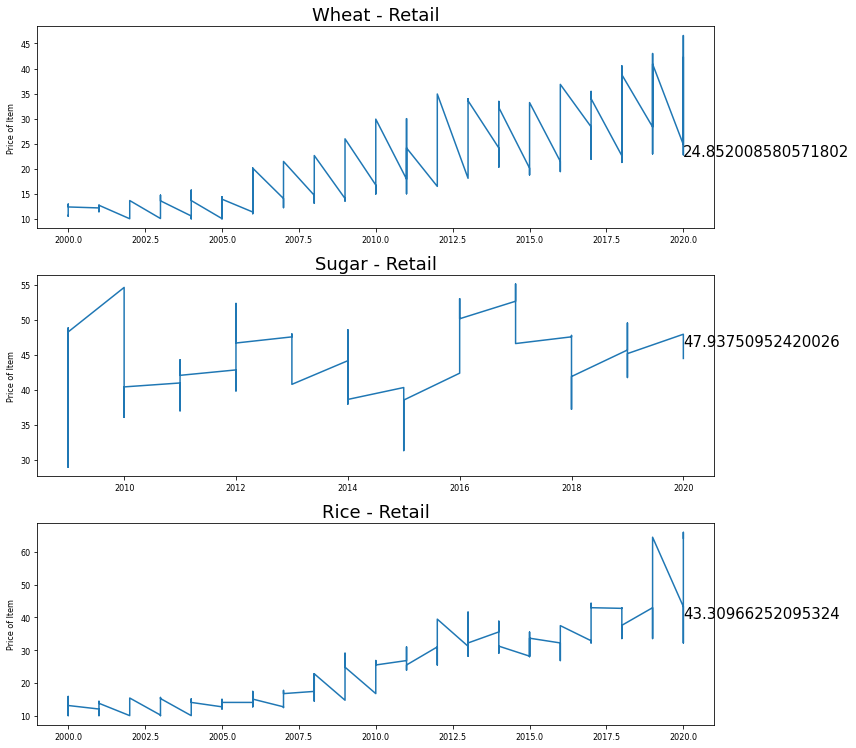

In [53]:
import matplotlib.pyplot as plt
items_list = item_specific['cm_name'].unique().tolist()
fig, ax = plt.subplots(nrows=len(items_list), figsize=(12,len(items_list)*3.5)) #dynamically set the figure size from the number of subplots. I find that 3.5 is a good height per subplot to see the data

for i in items_list:
    ind = items_list.index(i) #a trick to get a list of 0 to whatever 
    filt = item_specific['cm_name'] == i #filter the dataframe for each item in the list
    
    ax[ind].plot(item_specific.loc[filt]['mp_year'],item_specific.loc[filt]['currency_product']) #plotting the filtered dataframe. The brackets make the axis variable dynamic
    ax[ind].set_title(i, size=18) #here I am setting the title of each subplot to be the category
    ax[ind].set_ylabel('Price of Item', size=8) #setting the ylabel and font size
    ax[ind].xaxis.set_tick_params(labelsize=8) #setting the font size of the x axis
    ax[ind].yaxis.set_tick_params(labelsize=8) #setting the font size of the y axis
    
    #Optionally add data labels or text to the subplots
    cases_yesterday_filter = (item_specific['mp_year'] == item_specific['mp_year'].max()) & (item_specific['cm_name'] == i) 
    cases_yesterday = item_specific.loc[cases_yesterday_filter].iloc[0]['currency_product'] #applying the filter to the dataframe
    ax[ind].annotate(str(cases_yesterday), xy=(item_specific['mp_year'].max(),cases_yesterday),xycoords = 'data', ha ='left', va='top', fontsize =15) #adding the datapoint to the subplot
    plt.tight_layout()

## Using Plotly

In [54]:
#countries_list_top_20 = output3['cm_name'].unique()
import matplotlib.pyplot as plt
import plotly.express as px
items_list = item_specific['cm_name'].unique().tolist()
#fig, ax = plt.subplots(nrows=len(items_list), figsize=(12,len(items_list)*3.5)) #dynamically set the figure size from the number of subplots. I find that 3.5 is a good height per subplot to see the data

for i in items_list:
    ind = items_list.index(i) #a trick to get a list of 0 to whatever 
    filt = item_specific['cm_name'] == i #filter the dataframe for each item in the list
    print(i)
    fig = px.bar(x=item_specific.loc[filt]['mp_year'], y=item_specific.loc[filt]['currency_product'], labels={'x':'Year', 'y':'Price in $'})
    fig.show()


Wheat - Retail


Sugar - Retail


Rice - Retail


# Arkouda Configuration

In [48]:
cfg=ak.get_config()

In [49]:
cfg

{'arkoudaVersion': 'v2021.08.20+18.g7a657ad',
 'ZMQVersion': '4.3.2',
 'HDF5Version': '1.12.1',
 'serverHostname': 'MacBook-Pro-7.local',
 'ServerPort': 5555,
 'numLocales': 1,
 'numPUs': 4,
 'maxTaskPar': 4,
 'physicalMemory': 8589934592,
 'distributionType': 'domain(1,int(64),false)',
 'LocaleConfigs': [{'id': 0,
   'name': 'MacBook-Pro-7.local',
   'numPUs': 4,
   'maxTaskPar': 4,
   'physicalMemory': 8589934592}],
 'authenticate': False,
 'logLevel': 'INFO',
 'byteorder': 'little'}